In [202]:
import numpy as np
from scipy import stats
import itertools
import matplotlib.pyplot as plt
from Landscapes import *
import pandas as pd
import math

Dirichlet model definition:

Let $N$ be the n-cube and,
let $D(\alpha)$ be a dirichlet distribution with concentration parameters $\alpha$.

Then a Dirichlet Dot Product landscape is a fitness landscape in which the fitness of a point on $N$ is the dot product of that point and a draw from $Dir(\alpha)$

In [205]:
N=10
#hypers=[10000,10000,10000,10000,10000,10000,10000,10000,10000,10000]
#hypers=[100,100,100,100,100,100,100,100,100,100]
#hypers=[10,10,10,10,10,10,10,10,10,100]
hypers=[1,1,1,1,1,1,1,1,1,1]
#hypers = [.1,.1,.1,.1,.1,.1,.1,.1,.1,.1] 
#hypers = [.001,.001,.001,.001,.001,.001,.001,.001,.001,.001] 
our_dirichlet = stats.dirichlet(hypers)    


location = [0,.5,.5,.25,.25,.1,.1,.1,.7,.7]
#location = [0,1,1,1,1,1,1,1,1,1]
fitnesses = []
last_values = []
for i in range(0,5000):
    location[0] +=.01
    draw = our_dirichlet.rvs()[0]
    if math.isnan(draw[-1]):
        last_values.append(0)
    else:
        last_values.append(round(draw[-1],8))
    fitnesses.append(np.dot(location,draw))
  

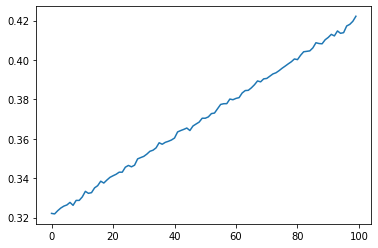

In [175]:
plt.plot(fitnesses)
#plt.plot(last_values)

In [176]:
import seaborn as sns

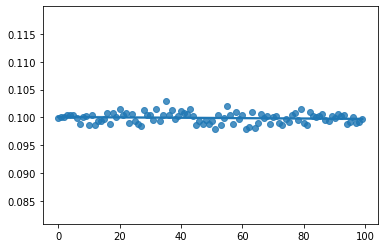

In [177]:
sns.regplot(range(0,100),last_values)

In [213]:
start = last_values[0]
diffs = []
for i in last_values[1:]:
    diffs.append(abs(start-i))
    start = i

In [214]:
np.mean(diffs)

0.18091139816563312

In [183]:
def make_Dirichland(N,K, concentration_params):

    our_dirichlet = stats.dirichlet(concentration_params) #the distribution we use

    NK_land = np.zeros((N,2**(K+1)))
    
    fitnesses = []
    permutations = []
    
    all_permutations = list(itertools.product([0,1],repeat = N))

    for permutation in all_permutations:
        #print(permutation)
        genome_fitness = 0
        for currentCharacteristic in np.arange(N):
            #get the fitness indices from each k based upon local gene values
            
            localgenes = permutation[currentCharacteristic:currentCharacteristic+K+1]
            
            #loop through to next if were are near the nth index
            if currentCharacteristic+K+1 > N:
                #print("wrapped", localgenes, currentCharacteristic-(N-K)+1,permutation[0:currentCharacteristic-(N-K)+1] )
                localgenes = np.append(localgenes,permutation[0:currentCharacteristic-(N-K)+1])
                #print("wrapped, local genes",localgenes)
                indices = list(range(currentCharacteristic,N)) + list(range(currentCharacteristic-(N-K)+1))
            else:
                indices = list(range(currentCharacteristic,currentCharacteristic+K+1))
            
            #get index fitness  is stored at
            interactIndex = ((2**(np.arange(K+1)*(localgenes)))*localgenes).sum()
            
            currentVal = NK_land[currentCharacteristic,interactIndex]
            #print("pre_check",currentCharacteristic, interactIndex, currentVal)
            if currentVal == 0:
                dir_draw = our_dirichlet.rvs()[0]
                
                currentVal= np.dot(localgenes,dir_draw)
                #print("creating new value", indices,localgenes,dir_draw,currentVal)
                NK_land[currentCharacteristic,interactIndex] = currentVal
            
            #add current value to the running fitness total

            genome_fitness += currentVal
            #print("fitness",interactIndex,genome_fitness)
        #print("\n\n")
        
        fitnesses.append(genome_fitness/N)
        permutations.append("".join([str(i) for i in permutation]))
    #print(NK_land)

    df = pd.DataFrame(fitnesses,index=permutations,columns=["Fitness"])
    df.loc[:,'Location'] = all_permutations

    return df

Avg distance for 90th percentile to Max	 2.3883495145631066
Num of Local Maxima			 2
Mean fitness 0.4997076542099017
S.D. of fitness 0.16242630471738354


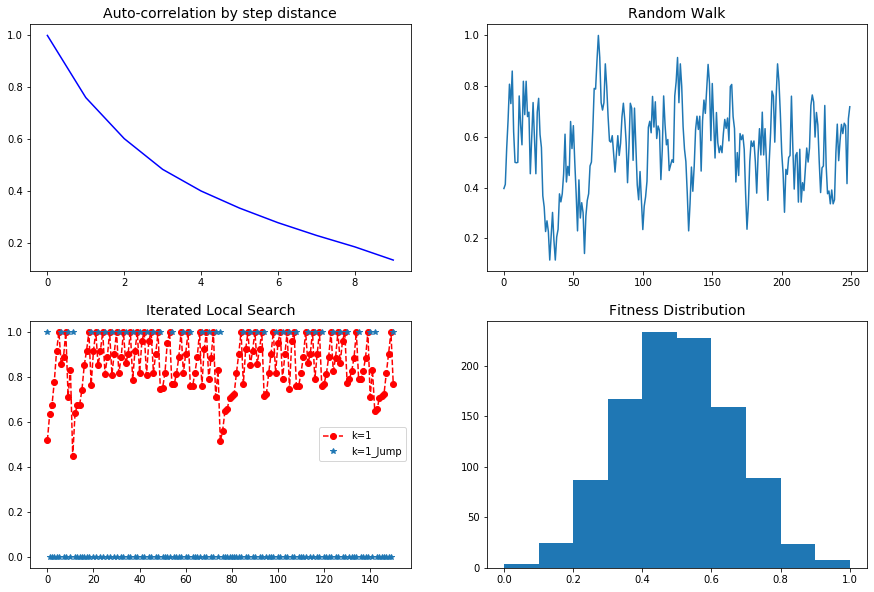

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


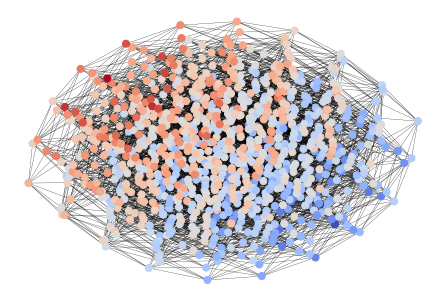

In [125]:
Get_Landscape_Summary(make_Dirichland(10,8,(1,1,1,1,1,1,1,1,1)),10)

Avg distance for 90th percentile to Max	 2.592233009708738
Num of Local Maxima			 25
Mean fitness 0.5038060443215009
S.D. of fitness 0.1985873802230434


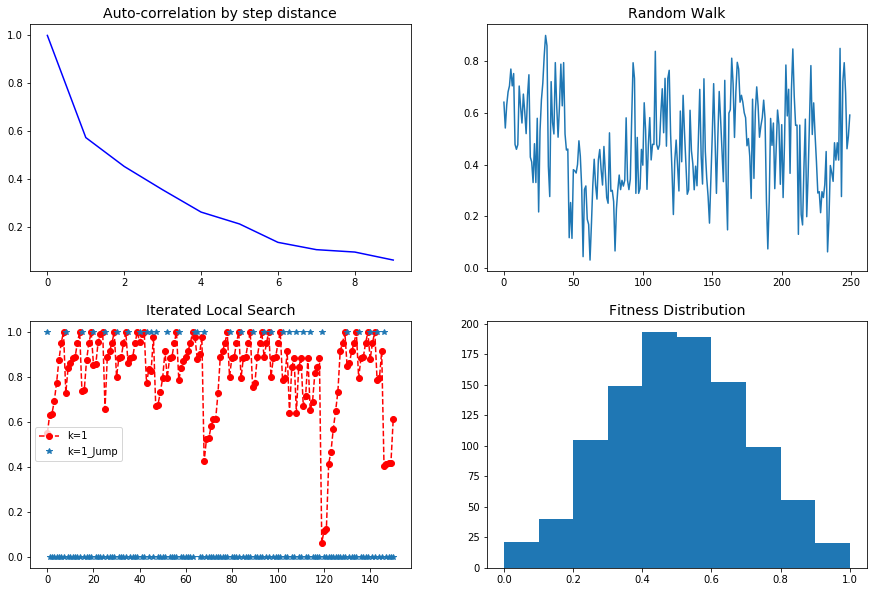

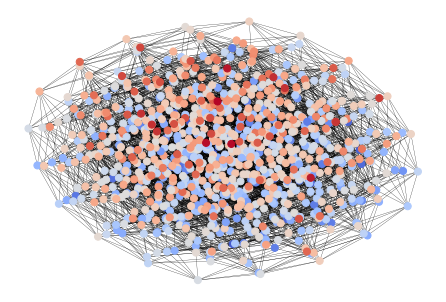

In [131]:
hypers = (.1,.1,.1,.1,.1,.1,.1,.1,.1)
#hypers = (1,1,1,1,1,1,1,1,1)
#hypers = (100,100,100,100,100,100,100,100,100)
Get_Landscape_Summary(make_Dirichland(10,8,hypers),10)

Avg distance for 90th percentile to Max	 3.145631067961165
Num of Local Maxima			 3
Mean fitness 0.516514802260385
S.D. of fitness 0.20288519949544923


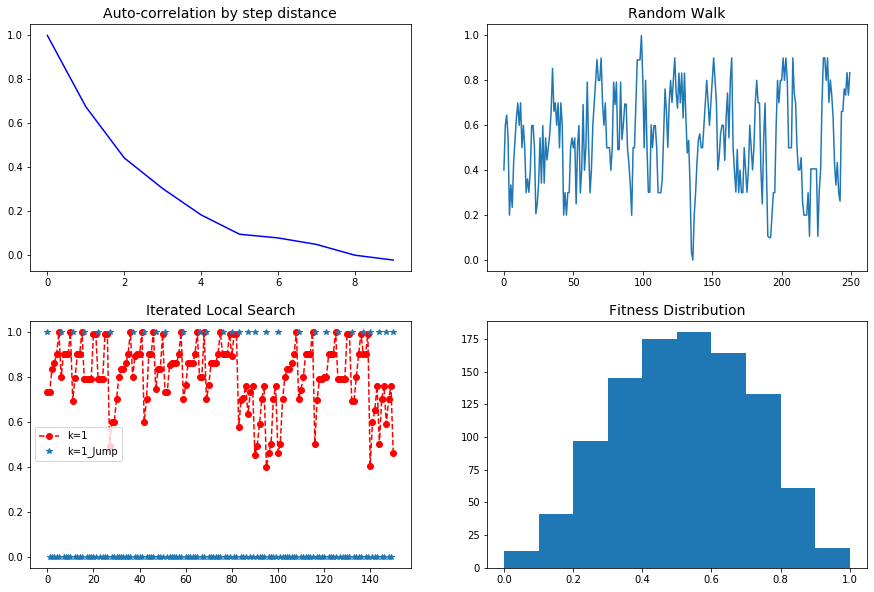

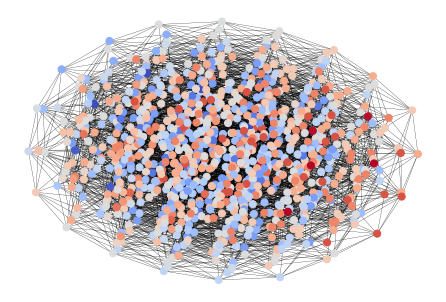

In [135]:
hypers = (.01,.01,.01,.01)
#hypers = (1,1,1,1,1,1,1,1,1)
#hypers = (100,100,100,100,100,100,100,100,100)
Get_Landscape_Summary(make_Dirichland(10,3,hypers),10)

Avg distance for 90th percentile to Max	 2.466019417475728
Num of Local Maxima			 1
Mean fitness 0.5131462693671672
S.D. of fitness 0.16998389257373525


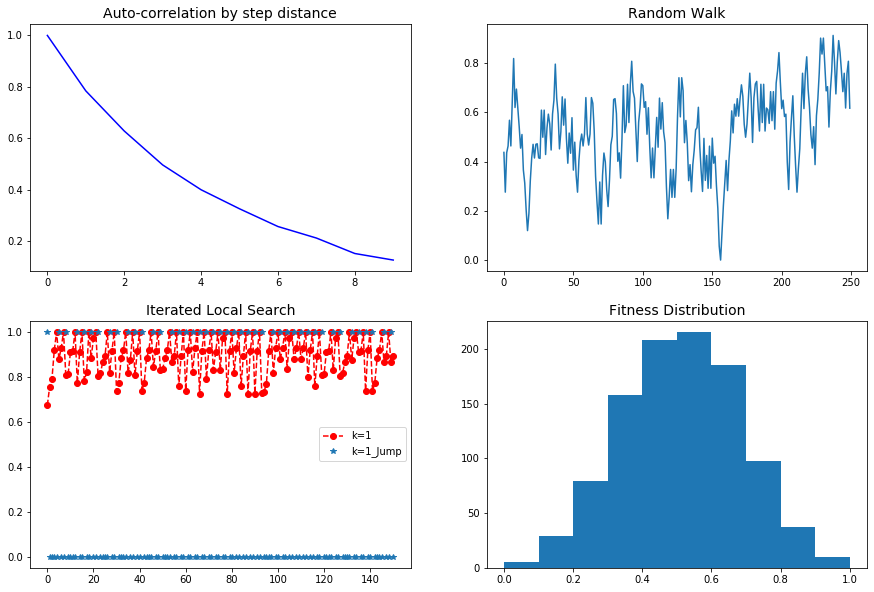

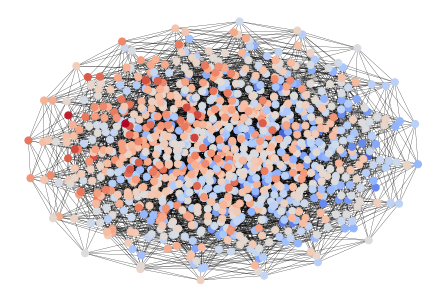

In [134]:
#hypers = (.1,.1,.1,.1)
hypers = (1,1,1,1)
#hypers = (100,100,100,100,100,100,100,100,100)
Get_Landscape_Summary(make_Dirichland(10,3,hypers),10)

In [123]:
def create_dotSpace(N=10,hypers=[1,1,1,1,1,1,1,1,1,1],masked=False, mask=None):
    our_dirichlet = stats.dirichlet(hypers)    
    all_permutations = list(itertools.product([0,1],repeat = N))
    fitnesses = []
    perms = []
    transformed_locs = []
    for perm in all_permutations:
        fitnesses.append(np.dot(perm,our_dirichlet.rvs()[0]))
        if masked:
            if mask:
                perm = transform(perm,mask)
            else:
                perm = transform(perm)
        perms.append("".join([str(i) for i in perm]))
        transformed_locs.append(perm)
    frame = {"Fitness":pd.Series(fitnesses,index=perms), "Location":pd.Series(transformed_locs,index=perms)}
    return pd.DataFrame(frame)

def transform(location, mask=[1,0,1,0,0,0,1,1,1,0]):
    assert len(location) == len(mask), "The mask needs to be same length as the location"
    
    return [abs(i-1) if j==1 else i for i,j in zip(location, mask)]

def get_iterated_search_walk(Landscape,Neighbor_Distance,Step_Size,Iterations):
    #initalize random position
    N=len(Landscape.iloc[0].Location)
    Position= Position_rand(N)

    FitnessHistory=[Landscape.loc["".join([str(i) for i in Position])].Fitness]
    #record jumps down
    Jump_Down_history=[1]

    for j in range(Iterations):

        #Identify the Neighbors (distance of M from initial position row)
        Neighbors = Landscape[Landscape['Location'].apply(lambda row : sum(abs(np.array(row)-np.array(Landscape.loc["".join([str(i) for i in Position])].Location)))==Neighbor_Distance)]

        BetterNeighbors = Neighbors[Neighbors.Fitness>Landscape.loc["".join([str(i) for i in Position])].Fitness]
        #randomize order of neighobrs then loop until one exceeds
        if len(BetterNeighbors)>0: #only update if there exists at least one superior neighobr
            BetterNeighbors.sample(frac=1)#randomly sample better neighbors
            Position = BetterNeighbors.index.values[0] #return the first index value
            Jump_Down_history.append(0)

        #take a step of size Step_Size
        else:
            Position = Perturbation(Position,Step_Size)
            Jump_Down_history.append(1)

            #Append to fitness data
        fit = Landscape.loc["".join([str(i) for i in Position])].Fitness
        FitnessHistory.append(fit)
        
    return(FitnessHistory,Jump_Down_history)


    
def Get_Landscape_Summary(df,N):


    ##Record the autocorrelation of a random walk
    FitnessPath = random_walker(1000, df)
    AR = Get_AR(FitnessPath,lag_range=N)

    MaximalLocation = df.iloc[:,0].idxmax() #get the index

    ####Now generate a statistic that finds how close on average, are the 90th percentile and above
    ####fitness to the maximum
    Percentile_90_Cutoff = (df.iloc[:,0].quantile(.90))
    #get those that pass cutoff
    CutoffPassed = df[ df.iloc[:,0]>= Percentile_90_Cutoff]
    Distances = CutoffPassed['Location'].apply(lambda row : sum(abs(np.array(row)-np.array(df.loc[MaximalLocation].Location))))
    Average_Distance_Percentile_90=Distances.mean()

    ##Now Identify the Number of Maxima
    Number_Maxima = Count_Local_Maxima(df)

    history, jump_history = get_iterated_search_walk(df,1,2,150)
    
    print("Avg distance for 90th percentile to Max\t", Average_Distance_Percentile_90)
    print("Num of Local Maxima\t\t\t",Number_Maxima)
    
    print("Mean fitness",df.Fitness.mean())
    print("S.D. of fitness", df.Fitness.var()**.5)

    f, axarr = plt.subplots(2,2,figsize=(15,10))
    axarr[0,0].set_title("Auto-correlation by step distance",size=14)
    axarr[0,0].plot(AR,color="b")
    axarr[0,1].set_title("Random Walk",size=14)
    axarr[0,1].plot(FitnessPath[:250])
    axarr[1,0].set_title("Iterated Local Search", size=14)
    axarr[1,0].plot((history),'r--o',label='k=1')
    axarr[1,0].plot((jump_history),'*',label='k=1_Jump')
    axarr[1,0].legend()

    axarr[1,1].set_title("Fitness Distribution", size=14)
    axarr[1,1].hist(df["Fitness"])
    
    plt.show()
    
    cmap=plt.cm.get_cmap('coolwarm')
    landscape_as_graph(df,cmap)

    
def landscape_as_graph(df,cmap):

    N=len(df.iloc[0].name)
    hypercube = nx.hypercube_graph(N)

    colors=[]
    fitness_dict = {}
    f_min = df.iloc[:,0].min()
    f_max = df.iloc[:,0].max()
    fractor = 1/(f_max-f_min)
    for row, focal_row in df.iterrows():
        source_fit = fractor*(focal_row.Fitness - f_min)
        fitness_dict[row]= source_fit
        colors.append(cmap(source_fit))

    nx.set_node_attributes(hypercube,fitness_dict, "fitness")

    nx.draw(hypercube, node_color=colors, with_labels=False, node_size=50,width=.25)  




In [147]:
all_permutations = list(itertools.product([0,1],repeat = N))
one = all_permutations.pop()

In [157]:
distances = []
for other in all_permutations:
    distances.append(hamming(one,other))

(array([ 10.,  45., 120., 210., 252., 210., 120.,  45.,  10.,   1.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

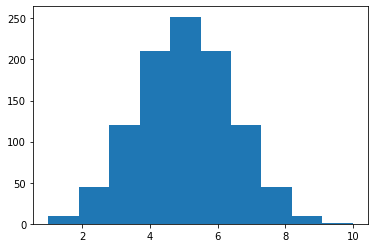

In [158]:
plt.hist(distances)

In [154]:
a = [1,1,1,1,1]
b = [0,0,0,0,1]

In [155]:
sum([abs(i-j) for i,j in zip(a,b)])

[1, 1, 1, 1, 0]

In [156]:
def hamming(one, two):
    return sum([abs(i-j) for i,j in zip(one,two)])

In [159]:
from scipy.stats import shapiro

In [160]:
shapiro(distances)

(0.9651848673820496, 6.372088678241331e-15)